# 导入所需要的包

In [184]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
import warnings
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,auc,confusion_matrix,f1_score,roc_auc_score
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')

# 处理数据

In [139]:
data = pd.read_csv('./data_processed.csv')
data

,pob,kids,married,fses,ynatstat,edarea,edachv,occ,school,relback,socbg,region,agejoin,cjoin,pljoin,risk
0,110.0,1.0,1.0,0.0,2.0,4.0,4.0,1.0,4.0,1.0,3.0,3.5,32.0,1.0,1.0,3.0
1,41.0,1.0,1.0,0.0,1.0,4.0,4.0,3.0,4.0,1.0,3.0,1.3,38.0,1.0,1.0,3.0
2,41.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,4.0,1.0,3.0,1.3,NaN,1.0,1.0,3.0
3,41.0,1.0,1.0,1.0,1.0,NaN,4.0,1.0,4.0,1.0,3.0,1.3,32.0,1.0,1.0,3.0
4,41.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,2.0,0.0,3.0,1.3,51.0,98.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,50.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,2.0,0.0,4.3,30.0,50.0,0.0,3.0
473,50.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,2.0,2.0,4.3,25.0,50.0,0.0,3.0
474,NaN,NaN,1.0,1.0,1.0,2.0,NaN,3.0,NaN,0.0,NaN,3.4,41.0,60.0,0.0,2.0
475,60.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,0.0,0.0,3.4,23.0,60.0,NaN,1.0


In [140]:
data = data.fillna(method='ffill')

In [141]:
data

,pob,kids,married,fses,ynatstat,edarea,edachv,occ,school,relback,socbg,region,agejoin,cjoin,pljoin,risk
0,110.0,1.0,1.0,0.0,2.0,4.0,4.0,1.0,4.0,1.0,3.0,3.5,32.0,1.0,1.0,3.0
1,41.0,1.0,1.0,0.0,1.0,4.0,4.0,3.0,4.0,1.0,3.0,1.3,38.0,1.0,1.0,3.0
2,41.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,4.0,1.0,3.0,1.3,38.0,1.0,1.0,3.0
3,41.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,4.0,1.0,3.0,1.3,32.0,1.0,1.0,3.0
4,41.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,2.0,0.0,3.0,1.3,51.0,98.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,50.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,2.0,0.0,4.3,30.0,50.0,0.0,3.0
473,50.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,2.0,2.0,4.3,25.0,50.0,0.0,3.0
474,50.0,0.0,1.0,1.0,1.0,2.0,1.0,3.0,4.0,0.0,2.0,3.4,41.0,60.0,0.0,2.0
475,60.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,0.0,0.0,3.4,23.0,60.0,0.0,1.0


In [142]:
X = data.ix[:,:-1]
y = data['risk']

In [143]:
X

,pob,kids,married,fses,ynatstat,edarea,edachv,occ,school,relback,socbg,region,agejoin,cjoin,pljoin
0,110.0,1.0,1.0,0.0,2.0,4.0,4.0,1.0,4.0,1.0,3.0,3.5,32.0,1.0,1.0
1,41.0,1.0,1.0,0.0,1.0,4.0,4.0,3.0,4.0,1.0,3.0,1.3,38.0,1.0,1.0
2,41.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,4.0,1.0,3.0,1.3,38.0,1.0,1.0
3,41.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,4.0,1.0,3.0,1.3,32.0,1.0,1.0
4,41.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,2.0,0.0,3.0,1.3,51.0,98.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,50.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,2.0,0.0,4.3,30.0,50.0,0.0
473,50.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,2.0,2.0,4.3,25.0,50.0,0.0
474,50.0,0.0,1.0,1.0,1.0,2.0,1.0,3.0,4.0,0.0,2.0,3.4,41.0,60.0,0.0
475,60.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,0.0,0.0,3.4,23.0,60.0,0.0


In [144]:
feature_name = X.columns
feature_name

Index(['pob', 'kids', 'married', 'fses', 'ynatstat', 'edarea', 'edachv', 'occ',
       'school', 'relback', 'socbg', 'region', 'agejoin', 'cjoin', 'pljoin'],
      dtype='object')

In [145]:
y

0      3.0
1      3.0
2      3.0
3      3.0
4      3.0
      ... 
472    3.0
473    3.0
474    2.0
475    1.0
476    2.0
Name: risk, Length: 477, dtype: float64

In [146]:
X = preprocessing.scale(X)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23323)

# model

svm

In [148]:
SVM = SVC()
SVM

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [149]:
SVM.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [150]:
y_pred = SVM.predict(X_test)
y_pred.shape

(48,)

In [151]:
y_test.shape

(48,)

In [152]:
accuracy_score(y_pred,y_test)

0.7291666666666666

In [153]:
confusion_matrix(y_pred=y_pred,y_true=y_test)

array([[ 1,  7,  0],
       [ 2, 32,  0],
       [ 0,  4,  2]], dtype=int64)

In [172]:
f1_score(y_true=y_test,y_pred=y_pred,average='weighted')

0.6815476190476191

rfc

0.775975975975976


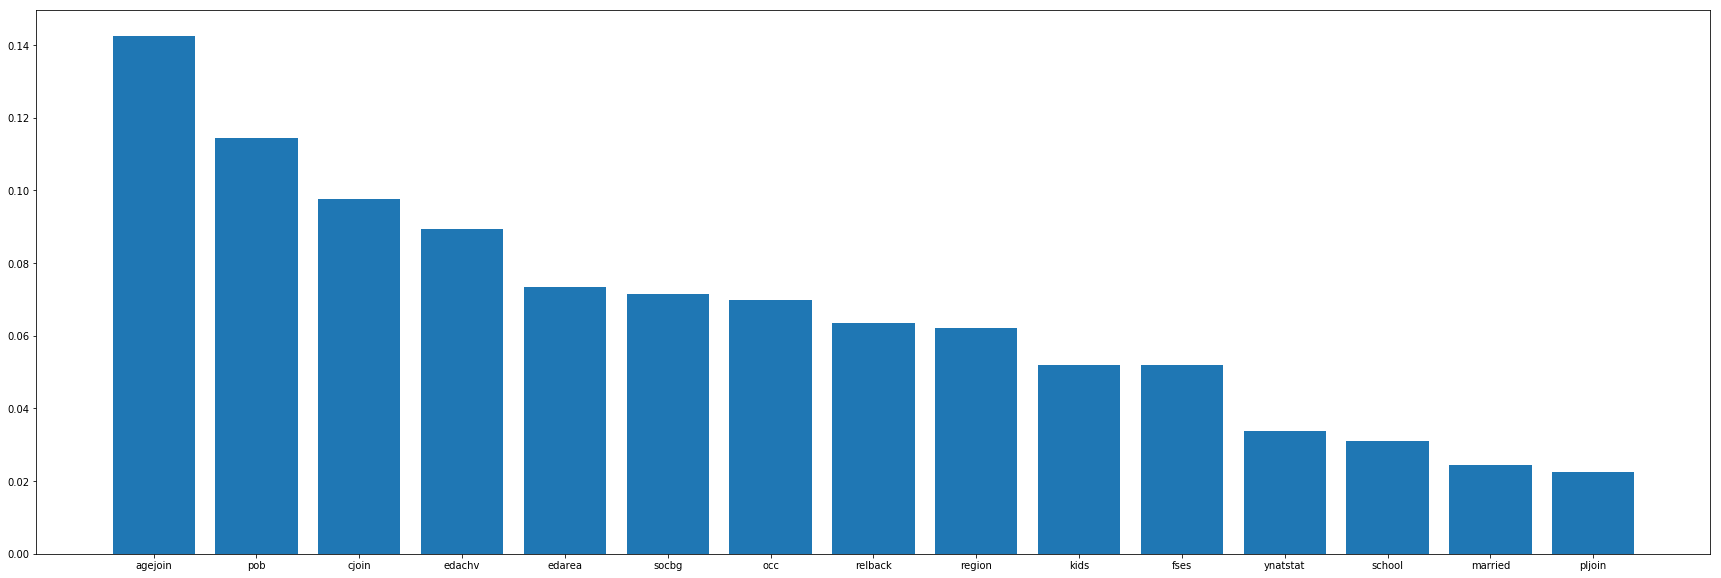

In [189]:
rfc = RandomForestClassifier(min_samples_split=2,n_estimators = 100,random_state = 42)
rfc.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print(f1_score(y_pred, y_test,average='weighted'))

# 使用pd.Series进行组合，值是特征重要性的值，index是样本特征，.sort_value 进行排序操作
feature_important = pd.Series(rfr.feature_importances_, index = feature_name).sort_values(ascending=False)
plt.figure(figsize=(30,10))
plt.bar(feature_important.index, feature_important.data)

plt.savefig('result.png')
plt.show()